# Equally Weighted Portfolio with Futures Contracts

In [1]:
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [2]:
start=pd.to_datetime('2010-01-01', format='%Y-%m-%d')
today_date = datetime.today().strftime('%Y-%m-%d')

DX=F: USDollar Future
ES=F: SP500 E-mini Future
GC=F: Gold Future

In [3]:
# Download futures data
symbols = ['DX=F', 'ES=F', 'GC=F']
prices_df = yf.download(symbols, start, today_date)

[*********************100%%**********************]  3 of 3 completed


In [4]:
# Prepare the data
prices_df = prices_df["Adj Close"] 
prices_df.index = pd.to_datetime(prices_df.index) 
prices_df = prices_df.ffill().dropna()

In [25]:
prices_df

Ticker,DX=F,ES=F,GC=F
Date,,,
2010-01-04,77.830002,1128.75,1117.699951
2010-01-05,77.849998,1132.25,1118.099976
2010-01-06,77.654999,1133.00,1135.900024
2010-01-07,78.105003,1137.50,1133.099976
2010-01-08,77.654999,1141.50,1138.199951
...,...,...,...
2024-08-05,102.483002,5217.50,2401.699951
2024-08-06,102.758003,5266.25,2389.100098
2024-08-07,102.998001,5227.50,2390.500000


In [22]:
# Compute returns
returns = prices_df.pct_change().fillna(0)
returns

Ticker,DX=F,ES=F,GC=F
Date,,,
2010-01-04,0.000000,0.000000,0.000000
2010-01-05,0.000257,0.003101,0.000358
2010-01-06,-0.002505,0.000662,0.015920
2010-01-07,0.005795,0.003972,-0.002465
2010-01-08,-0.005762,0.003516,0.004501
...,...,...,...
2024-08-05,-0.004903,-0.029483,-0.009894
2024-08-06,0.002683,0.009344,-0.005246
2024-08-07,0.002336,-0.007358,0.000586


In [6]:
#https://numpy.org/doc/stable/reference/generated/numpy.ones.html

equal_weights = np.ones(returns.shape[1]) / returns.shape[1]
equally_weighted_returns = returns.apply(lambda row: row * equal_weights , axis =1)

In [7]:
equally_weighted_returns

Ticker,DX=F,ES=F,GC=F
Date,,,
2010-01-04,0.000000,0.000000,0.000000
2010-01-05,0.000086,0.001034,0.000119
2010-01-06,-0.000835,0.000221,0.005307
2010-01-07,0.001932,0.001324,-0.000822
2010-01-08,-0.001921,0.001172,0.001500
...,...,...,...
2024-08-05,-0.001634,-0.009828,-0.003298
2024-08-06,0.000894,0.003115,-0.001749
2024-08-07,0.000779,-0.002453,0.000195


In [8]:
# Compute cumulative returns
cum_returns = (1 + returns).cumprod() 
cum_weighted_returns = (1 + equally_weighted_returns).cumprod ()
equal_weight_portfolio = (1 + equally_weighted_returns.sum(axis=1)).cumprod()

In [23]:
equal_weight_portfolio

Date
2010-01-04    1.000000
2010-01-05    1.001239
2010-01-06    1.005937
2010-01-07    1.008385
2010-01-08    1.009143
                ...   
2024-08-05    2.626340
2024-08-06    2.632277
2024-08-07    2.628384
2024-08-08    2.660444
2024-08-09    2.680580
Length: 3674, dtype: float64

In [24]:
cum_weighted_returns

Ticker,DX=F,ES=F,GC=F
Date,,,
2010-01-04,1.000000,1.000000,1.000000
2010-01-05,1.000086,1.001034,1.000119
2010-01-06,0.999251,1.001255,1.005427
2010-01-07,1.001181,1.002580,1.004600
2010-01-08,0.999258,1.003755,1.006108
...,...,...,...
2024-08-05,1.105422,1.750070,1.344978
2024-08-06,1.106410,1.755521,1.342626
2024-08-07,1.107272,1.751215,1.342888


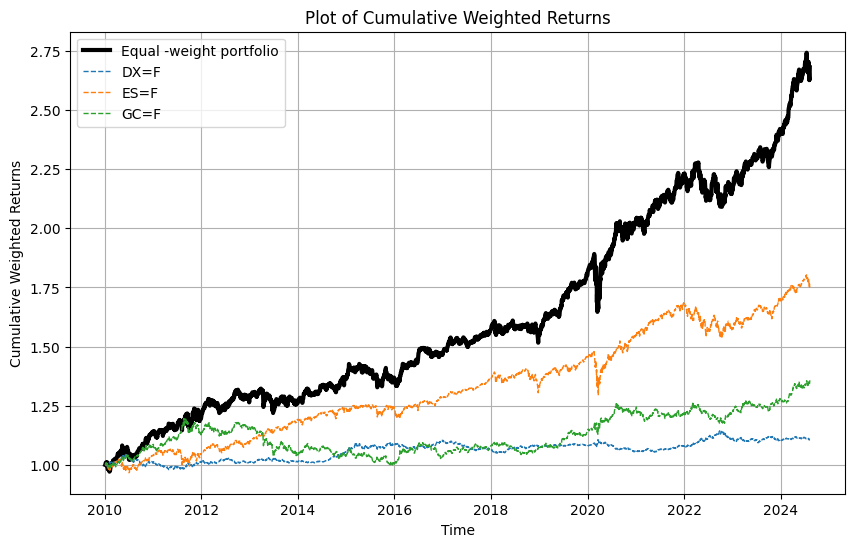

In [9]:
# Plot equally weighted portfolio
plt.figure(figsize=(10, 6))
plt.plot(
    equal_weight_portfolio , color="black",
    linewidth=3,
    label="Equal -weight portfolio")

plt.plot(cum_weighted_returns, label=symbols, linestyle="--", linewidth=1)
plt.xlabel("Time")
plt.ylabel('Cumulative Weighted Returns') 
plt.title('Plot of Cumulative Weighted Returns') 
plt.legend()
plt.grid()
plt.show()

In [10]:
# Contract sizes
sizes = np.array([1000, 50, 100]) 
sizes_df = pd.DataFrame(sizes , index=symbols , columns=["size"] )
print(sizes_df)

      size
DX=F  1000
ES=F    50
GC=F   100


In [11]:
# Starting prices
starting_prices = prices_df.head(1).values 
starting_prices_df = pd.DataFrame(starting_prices.T, index=symbols , columns=["starting_price"] )
print(starting_prices_df)

      starting_price
DX=F       77.830002
ES=F     1128.750000
GC=F     1117.699951


In [12]:
# Contract values
contract_values = starting_prices * sizes 
contract_values_df = pd.DataFrame(contract_values.T, index=symbols, columns=["contract_value"] )
print(contract_values_df)

      contract_value
DX=F    77830.001831
ES=F    56437.500000
GC=F   111769.995117


In [13]:
# Compute proportions
proportions = (1 / contract_values) / (1 / contract_values). sum ()
proportions_df = pd.DataFrame( proportions.T,index=symbols , columns=["proportion"] )
print(proportions_df)

      proportion
DX=F    0.325162
ES=F    0.448414
GC=F    0.226424


In [14]:
# Minimum number of contracts
min_n_contracts = proportions / proportions.min() 
min_n_contracts_df = pd.DataFrame(min_n_contracts.T, index=symbols , columns=["min_n_contracts"] )
print(min_n_contracts_df)

      min_n_contracts
DX=F         1.436079
ES=F         1.980421
GC=F         1.000000


In [15]:
# Minimum notional amount
min_notional_amount_df = contract_values_df * min_n_contracts_df.values
min_notional_amount_df.columns = ["min_notional_amount"] 
print(min_notional_amount_df)

      min_notional_amount
DX=F        111769.995117
ES=F        111769.995117
GC=F        111769.995117


In [16]:
# Needed units and contracts
principal = 10000000
needed_units = principal / min_notional_amount_df.sum()[0] 
needed_contracts_df = min_n_contracts_df * needed_units 
needed_contracts_df.columns = ["needed_contracts"] 
needed_contracts_df = needed_contracts_df.round()
print(needed_contracts_df)

      needed_contracts
DX=F              43.0
ES=F              59.0
GC=F              30.0


/var/folders/9f/g6tpsc8n5qb861y9f7rpwlcm0000gn/T/ipykernel_25140/1462240826.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  needed_units = principal / min_notional_amount_df.sum()[0]


In [17]:
#https://numpy.org/doc/stable/reference/generated/numpy.tile.html


# Repeat contract sizes and needed contracts for each date
needed_contracts_df = pd.DataFrame(np.tile(needed_contracts_df.values.T,(len(prices_df),1)),
    index=prices_df.index , 
    columns=prices_df.columns)


sizes_df = pd.DataFrame(np.tile(sizes_df.values.T, (len(prices_df),1)),
    index=prices_df.index , 
    columns=prices_df.columns)

In [18]:
# Calculate portfolio value
portfolio_df = (prices_df * sizes_df * needed_contracts_df ).round(2)
print(portfolio_df)

Ticker            DX=F        ES=F        GC=F
Date                                          
2010-01-04  3346690.08   3329812.5  3353099.85
2010-01-05  3347549.93   3340137.5  3354299.93
2010-01-06  3339164.95   3342350.0  3407700.07
2010-01-07  3358515.14   3355625.0  3399299.93
2010-01-08  3339164.95   3367425.0  3414599.85
...                ...         ...         ...
2024-08-05  4406769.07  15391625.0  7205099.85
2024-08-06  4418594.14  15535437.5  7167300.29
2024-08-07  4428914.05  15421125.0  7171500.00
2024-08-08  4429946.14  15777337.5  7266599.85
2024-08-09  4428140.14  15826750.0  7411800.29

[3674 rows x 3 columns]


In [19]:
# Calculate total returns
cash_balance = principal - portfolio_df.iloc[0].sum() 
total_returns = portfolio_df.sum(axis=1) + cash_balance

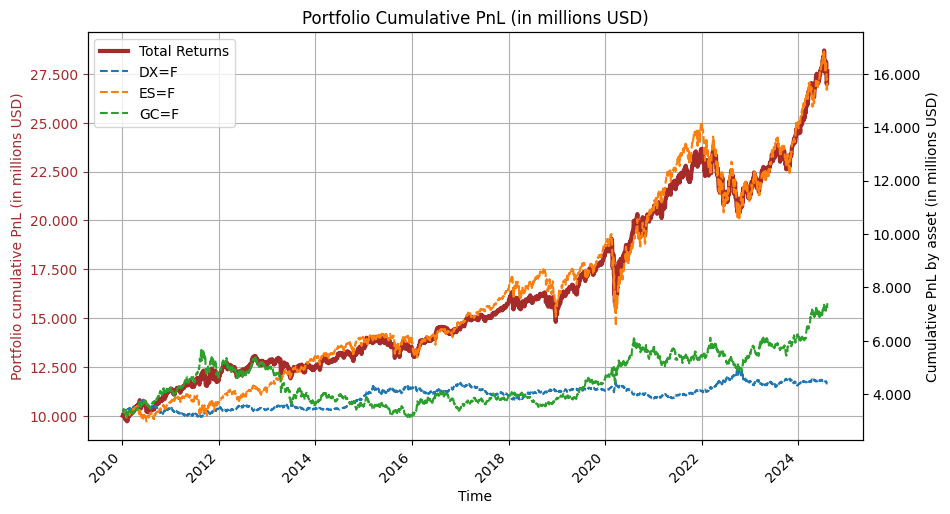

In [20]:
# Plot NAV
fig, ax1 = plt.subplots(figsize=(10, 6)) 
ax1.plot(
    total_returns.index, 
    total_returns , 
    color='brown', 
    label='Total Returns', 
    linewidth=3
    )
ax1.set_xlabel('Time')
ax1.set_ylabel('Portfolio cumulative PnL (in millions USD)') 
ax1.set_title('Portfolio Cumulative PnL (in millions USD)') 
ax1.yaxis.set_major_formatter(
FuncFormatter(lambda x, pos: f'{x * 1e-6:.3f}') )


# Create a second y-axis for the individual assets
ax2 = ax1.twinx()
portfolio_df.plot(ax=ax2, linestyle="--", legend=False) 
ax2.set_ylabel('Cumulative PnL by asset (in millions USD)') 
ax2.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{x * 1e-6:.3f}') )

# Combine legends
lines_1, labels_1 = ax1.get_legend_handles_labels() 
lines_2, labels_2 = ax2.get_legend_handles_labels() 
ax1.legend(lines_1 + lines_2 , labels_1 + labels_2)

# Set grid lines and rotate x-ticks
ax1.grid()
ax1.tick_params(axis='y', colors='brown') 
ax1.yaxis.label.set_color('brown') 
plt.setp(ax1.get_xticklabels(), rotation=45, ha="right")

plt.show()